# 範例1. 重建卷積層處理後的影像
### 程式修改自
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [1]:
# 載入套件
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

## 載入 VGG16 模型

In [2]:
# 載入 VGG16 模型
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 取得所有卷積層

In [21]:
# 取得所有卷積層
ixs = []
i=-1
for layer in model.layers:
    i+=1
    if 'conv' not in layer.name:
        continue
    print(i, layer.name)
    ixs.append(i)

1 block1_conv1
2 block1_conv2
4 block2_conv1
5 block2_conv2
7 block3_conv1
8 block3_conv2
9 block3_conv3
11 block4_conv1
12 block4_conv2
13 block4_conv3
15 block5_conv1
16 block5_conv2
17 block5_conv3


## 視覺化特定層的特徵圖

In [4]:
model.layers[1].name

'block1_conv1'

In [5]:
# 定義視覺化特徵圖的函數
def Visualize(layer_no=1, n_filters=6):
    # 取得權重(weight)
    filters, biases = model.layers[layer_no].get_weights()
    # 常態化(Normalization)
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    # 繪製特徵圖
    ix = 1
    for i in range(n_filters):       
        f = filters[:, :, :, i]   # 取得每一個特徵圖        
        for j in range(3):        # 每列 3 張圖 
            ax = plt.subplot(n_filters, 3, ix)  # 指定子視窗
            ax.set_xticks([])     # 無X軸刻度
            ax.set_yticks([])     # 無Y軸刻度
            plt.imshow(f[:, :, j], cmap='gray') # 以灰階繪圖
            ix += 1
    plt.show()

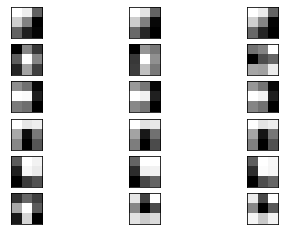

In [6]:
Visualize(1)

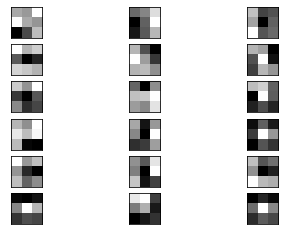

In [7]:
Visualize(15)

## 取得所有卷積層的特徵圖(Feature Map)

In [20]:
i=-1
for layer in model.layers:
    i+=1
    # 取得所有卷積層
    if 'conv' not in layer.name:
        continue
    # 取得特徵圖
    filters, biases = layer.get_weights()
    print(i, layer.name, filters.shape)

1 block1_conv1 (3, 3, 3, 64)
2 block1_conv2 (3, 3, 64, 64)
4 block2_conv1 (3, 3, 64, 128)
5 block2_conv2 (3, 3, 128, 128)
7 block3_conv1 (3, 3, 128, 256)
8 block3_conv2 (3, 3, 256, 256)
9 block3_conv3 (3, 3, 256, 256)
11 block4_conv1 (3, 3, 256, 512)
12 block4_conv2 (3, 3, 512, 512)
13 block4_conv3 (3, 3, 512, 512)
15 block5_conv1 (3, 3, 512, 512)
16 block5_conv2 (3, 3, 512, 512)
17 block5_conv3 (3, 3, 512, 512)


## 重建第一個卷積層的輸出圖像

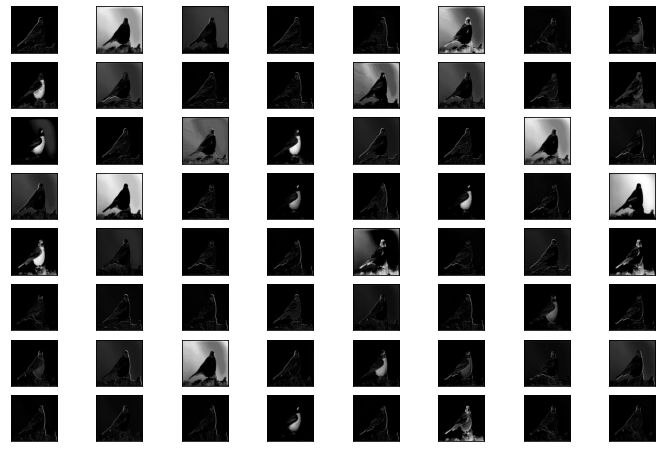

In [9]:
# 設定第一個卷積層的輸出為模型輸出
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

# 載入測試的圖像
img = tf.keras.preprocessing.image.load_img('./images_test/bird.jpg', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)    # 圖像轉為陣列
img = np.expand_dims(img, axis=0)                       # 加一維作為筆數
img = tf.keras.applications.vgg16.preprocess_input(img) # 前置處理(常態化)

# 預測
feature_maps = model2.predict(img)

# 將結果以 8x8 視窗顯示
square = 8
ix = 1
plt.figure(figsize=(12,8))
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.show()

## 重建 2, 5, 9, 13, 17 多層卷積層的輸出圖像

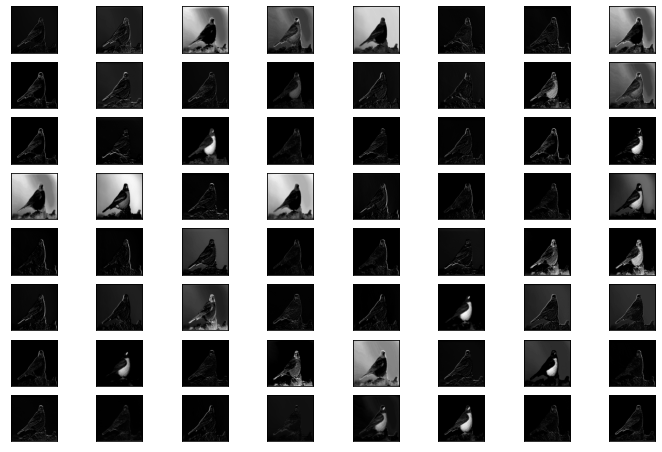

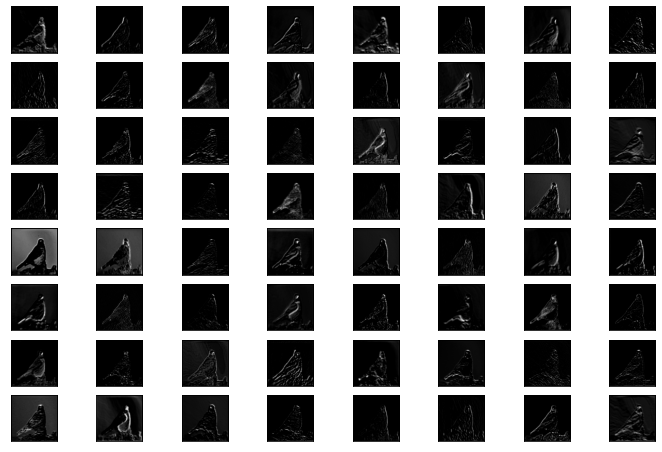

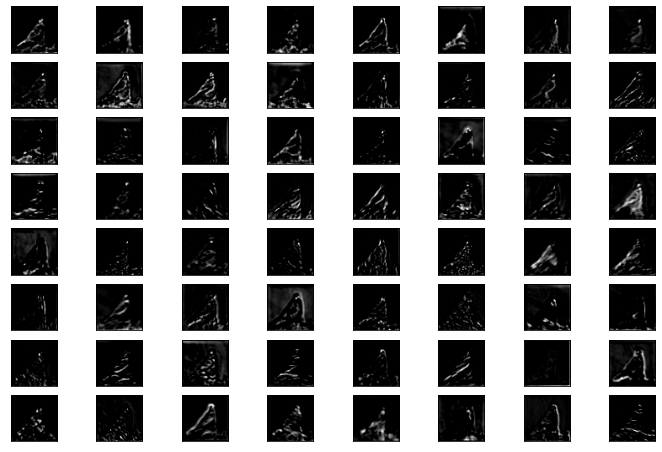

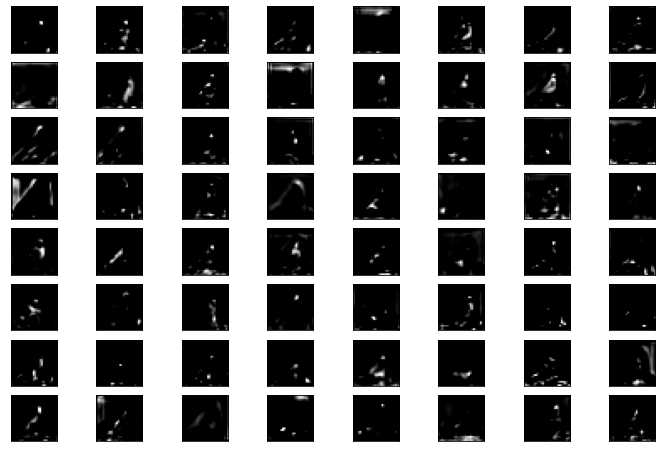

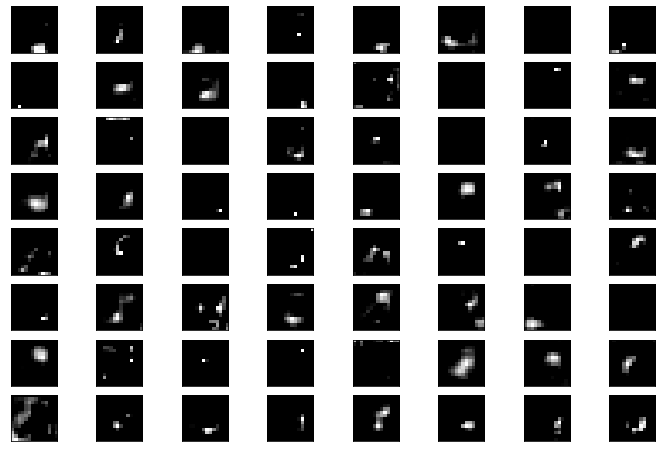

In [18]:
# 取得 2, 5, 9, 13, 17 卷積層輸出
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)

# 載入測試的圖像
img = tf.keras.preprocessing.image.load_img('./images_test/bird.jpg', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)    # 圖像轉為陣列
img = np.expand_dims(img, axis=0)                       # 加一維作為筆數
img = tf.keras.applications.vgg16.preprocess_input(img) # 前置處理(常態化)

# 預測
feature_maps = model2.predict(img)

# 將結果以 8x8 視窗顯示
square = 8
for fmap in feature_maps:
    ix = 1
    plt.figure(figsize=(12,8))
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    plt.show()